In [1]:
from tensorflow.keras.models import Sequential  # 순차적으로 층을 쌓는 신경망 모델 생성에 필요한 클래스입니다.
from tensorflow.keras.layers import Dense       # 완전 연결(Dense) 층을 추가할 때 사용하는 클래스입니다.
import numpy as np                              # 수치 계산과 배열 연산을 위해 NumPy 라이브러리를 불러옵니다.

In [2]:
!git clone https://github.com/kyuchangChang/202508_LG.git
!ls

Cloning into '202508_LG'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 20.14 MiB | 33.69 MiB/s, done.
Resolving deltas: 100% (1/1), done.
202508_LG  sample_data


In [3]:
%cd 202508_LG

/content/202508_LG


In [4]:
import zipfile
import os

zip_path = "data.zip"   
extract_dir = "data"    

# 압축 풀기
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# 압축 풀린 파일 목록 확인
os.listdir(extract_dir)

['pima-indians-diabetes3.csv',
 'img',
 'gan_images',
 'house_train.csv',
 'wine.csv',
 'kaggle',
 'train',
 'titanic_train.csv',
 'house_test.csv',
 'ThoraricSurgery3.csv',
 'diabetes.csv',
 'test',
 'model',
 'sentiment_data.csv',
 'sonar3.csv',
 'iris3.csv']

In [ ]:
#from google.colab import files
#uploaded = files.upload()

Saving ThoraricSurgery3.csv to ThoraricSurgery3.csv


In [7]:
Data_set = np.loadtxt("data/ThoraricSurgery3.csv", delimiter=",")  
X = Data_set[:, 0:16]                                         
y = Data_set[:, 16]

In [8]:
model = Sequential()                                # 순차적으로 층을 쌓는 신경망 모델
model.add(Dense(30, input_dim=16, activation='relu'))  # 입력층(16개 특성)과 연결된 은닉층: 뉴런 30개, ReLU 활성화 함수 사용
model.add(Dense(1, activation='sigmoid'))            


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(X, y, epochs=5, batch_size=16)
# 데이터를 이용해 모델을 학습시킵니다.


Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.1494 - loss: 23.0595
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1207 - loss: 13.4951
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1743 - loss: 4.3358
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8230 - loss: 0.9170
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7996 - loss: 0.6776


In [10]:
# 입력 데이터와 목표 데이터를 각각 x, y라는 NumPy 배열로 정의합니다.
x = np.array([2, 4, 6, 8])    # 예시 입력값
y = np.array([81, 93, 91, 97])  # 예시 출력값(목표값)


In [11]:
#x의 평균값을 구합니다.
mx = np.mean(x)

#y의 평균값을 구합니다.
my = np.mean(y)

# 출력으로 확인합니다.
print("x의 평균값:", mx)
print("y의 평균값:", my)

x의 평균값: 5.0
y의 평균값: 90.5


In [12]:
# 입력 데이터 x의 평균을 계산합니다.
mx = np.mean(x)

# 목표 데이터 y의 평균을 계산합니다.
my = np.mean(y)

# 계산된 평균값을 출력합니다.
print("x의 평균값:", mx)
print("y의 평균값:", my)


x의 평균값: 5.0
y의 평균값: 90.5


In [14]:
# 기울기 공식의 분모 부분입니다.
divisor = sum([(i - mx)**2 for i in x])

# 기울기 공식의 분자 부분입니다.
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)

# 출력으로 확인합니다.
print("분모:", divisor)
print("분자:", dividend)

분모: 20.0
분자: 46.0


In [15]:
# 기울기 a를 구하는 공식입니다.
a = dividend / divisor

# y절편 b 를 구하는 공식입니다.
b = my - (mx*a)

# 출력으로 확인합니다.
print("기울기 a =", a)
print("y절편 b =", b)

기울기 a = 2.3
y절편 b = 79.0


평균 제곱 오차

In [16]:
# 예시용으로 임의의 기울기(a)와 절편(b)을 설정합니다.
fake_a = 3
fake_b = 76

# 입력 데이터와 목표 데이터를 NumPy 배열로 정의합니다.
x = np.array([2, 4, 6, 8])      # 예시 입력값
y = np.array([81, 93, 91, 97])  # 예시 출력값


In [17]:

# y = ax + b 형태
def predict(x):
    return fake_a * x + fake_b

# 예측 결과를 저장할 빈 리스트를 생성합니다.
predict_result = []

# 모든 입력값 x에 대해 예측값을 계산하고 리스트에 추가합니다.
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("입력값=%.f, 실제값=%.f, 예측값=%.f" % (x[i], y[i], predict(x[i])))


입력값=2, 실제값=81, 예측값=82
입력값=4, 실제값=93, 예측값=88
입력값=6, 실제값=91, 예측값=94
입력값=8, 실제값=97, 예측값=100


선형 회귀 모델

In [18]:
#matplotlib 라이브러리를 설치합니다.
!pip install matplotlib

In [19]:
import numpy as np                     # 수치 계산과 배열 연산을 위한 NumPy
import matplotlib.pyplot as plt        # 간단한 시각화를 위한 Matplotlib

# 입력 데이터(x)와 목표 데이터(y)를 NumPy 배열로 정의합니다.
x = np.array([2, 4, 6, 8])      # 예시 입력값
y = np.array([81, 93, 91, 97])


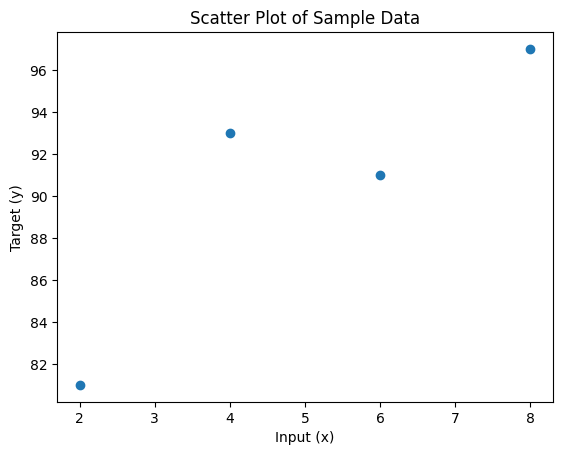

In [20]:
# 입력 데이터(x)와 목표 데이터(y)의 관계를 산점도로 시각화합니다.
plt.scatter(x, y)
plt.xlabel("Input (x)")
plt.ylabel("Target (y)")
plt.title("Scatter Plot of Sample Data")
plt.show()


In [21]:

a = 0
b = 0


lr = 0.03


epochs = 2001

In [22]:

n=len(x)

#경사 하강법
for i in range(epochs):                 

    y_pred = a * x + b                   #
    error = y - y_pred                   # 

    a_diff = (2/n) * sum(-x * (error))   # 
    b_diff = (2/n) * sum(-(error))       # 

    a = a - lr * a_diff     # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


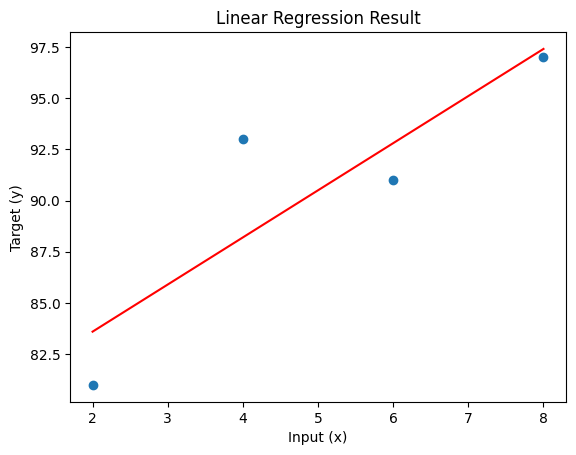

In [23]:
# 학습된 기울기(a)와 절편(b)을 사용하여 예측값을 계산합니다.
y_pred = a * x + b

# 실제 데이터와 예측 직선을 함께 시각화합니다.
plt.scatter(x, y)          # 실제 데이터 산점도
plt.plot(x, y_pred, 'r')   # 예측 직선(빨간색)
plt.xlabel("Input (x)")
plt.ylabel("Target (y)")
plt.title("Linear Regression Result")
plt.show()



In [24]:
# 새로운 데이터 준비
# 두 개의 입력 변수(x1, x2)와 목표 변수(y)를 NumPy 배열로 정의합니다.
x1 = np.array([2, 4, 6, 8])   # 입력 변수 1 (예: 특성 A)
x2 = np.array([0, 4, 2, 3])   # 입력 변수 2 (예: 특성 B)
y  = np.array([81, 93, 91, 97])  # 목표 변수 (예: 출력값)


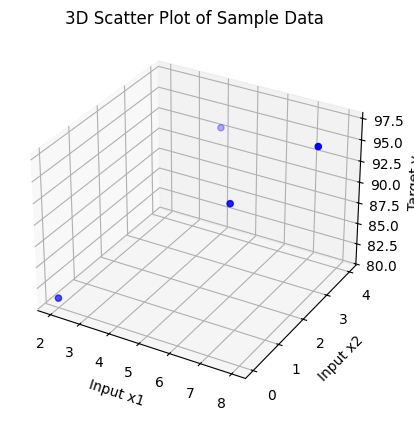

In [25]:
# 두 개의 입력 변수(x1, x2)와 목표 변수(y)의 관계를 3차원 산점도로 시각화합니다.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y, c='blue', marker='o')  # 파란색 원으로 데이터 표시

# 축 라벨을 추가하여 의미를 명확히 합니다.
ax.set_xlabel("Input x1")
ax.set_ylabel("Input x2")
ax.set_zlabel("Target y")
ax.set_title("3D Scatter Plot of Sample Data")

plt.show()


In [26]:
# 기울기(a1, a2)와 절편(b)의 초기값을 설정합니다.
a1 = 0   # 입력 변수 x1에 대한 가중치(기울기)
a2 = 0   # 입력 변수 x2에 대한 가중치(기울기)
b  = 0   # 절편(편향, bias)

# 학습률(learning rate)을 지정합니다.
lr = 0.01

# 학습 반복 횟수(epochs)를 설정합니다.
epochs = 2001


경사하강법

In [27]:
# 데이터 개수를 구합니다. (x1, x2의 길이는 동일하므로 x1 기준으로 계산)
n = len(x1)

# 경사하강법(Gradient Descent)을 수행합니다.
for i in range(epochs):  # 설정한 epoch 횟수만큼 반복 수행


    y_pred = a1 * x1 + a2 * x2 + b

  
    error = y - y_pred

    # 각 변수에 대한 기울기(편미분 결과) 계산
    a1_diff = (2/n) * sum(-x1 * error)  
    a2_diff = (2/n) * sum(-x2 * error)  
    b_diff  = (2/n) * sum(-error)       

    # 경사하강법 업데이트 규칙에 따라 a1, a2, b 값을 갱신
    a1 = a1 - lr * a1_diff
    a2 = a2 - lr * a2_diff
    b  = b - lr * b_diff

    # 학습 과정 중 100번째 epoch마다 현재 파라미터 값을 출력
    if i % 100 == 0:
        print("epoch=%d, 기울기1=%.4f, 기울기2=%.4f, 절편=%.4f" % (i, a1, a2, b))


epoch=0, 기울기1=9.2800, 기울기2=4.2250, 절편=1.8100
epoch=100, 기울기1=9.5110, 기울기2=5.0270, 절편=22.9205
epoch=200, 기울기1=7.3238, 기울기2=4.2950, 절편=37.8751
epoch=300, 기울기1=5.7381, 기울기2=3.7489, 절편=48.7589
epoch=400, 기울기1=4.5844, 기울기2=3.3507, 절편=56.6800
epoch=500, 기울기1=3.7447, 기울기2=3.0608, 절편=62.4448
epoch=600, 기울기1=3.1337, 기울기2=2.8498, 절편=66.6404
epoch=700, 기울기1=2.6890, 기울기2=2.6962, 절편=69.6938
epoch=800, 기울기1=2.3653, 기울기2=2.5845, 절편=71.9160
epoch=900, 기울기1=2.1297, 기울기2=2.5032, 절편=73.5333
epoch=1000, 기울기1=1.9583, 기울기2=2.4440, 절편=74.7103
epoch=1100, 기울기1=1.8336, 기울기2=2.4009, 절편=75.5670
epoch=1200, 기울기1=1.7428, 기울기2=2.3695, 절편=76.1904
epoch=1300, 기울기1=1.6767, 기울기2=2.3467, 절편=76.6441
epoch=1400, 기울기1=1.6286, 기울기2=2.3301, 절편=76.9743
epoch=1500, 기울기1=1.5936, 기울기2=2.3180, 절편=77.2146
epoch=1600, 기울기1=1.5681, 기울기2=2.3092, 절편=77.3895
epoch=1700, 기울기1=1.5496, 기울기2=2.3028, 절편=77.5168
epoch=1800, 기울기1=1.5361, 기울기2=2.2982, 절편=77.6095
epoch=1900, 기울기1=1.5263, 기울기2=2.2948, 절편=77.6769
epoch=2000, 기울기1=1.5191, 기울기2=2.2

In [28]:
#실제 점수와 예측 된 점수를 출력합니다.
print("실제 점수:", y)
print("예측 점수:", y_pred)

실제 점수: [81 93 91 97]
예측 점수: [80.76387645 92.97153922 91.42520875 96.7558749 ]


선형 회귀 모델_KERAS

In [29]:
import numpy as np                     # 수치 계산과 배열 연산을 위한 NumPy
import matplotlib.pyplot as plt        # 데이터 시각화를 위한 Matplotlib

# Keras(딥러닝 고수준 API)에서 순차 모델과 완전연결(Dense) 층을 불러옵니다.
from tensorflow.keras.models import Sequential   
from tensorflow.keras.layers import Dense       


In [30]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [31]:
model = Sequential()  # 순차 모델 생성

# 입력 1개 → 출력 1개인 선형 회귀 모델
model.add(Dense(1, input_dim=1, activation='linear'))

# 최적화: SGD, 손실: MSE
model.compile(optimizer='sgd', loss='mse')

# 학습: 500 epoch (verbose=0: 출력 생략)
model.fit(x, y, epochs=500, verbose=0)

# (선택) 재현성 확보용 시드 — 필요 시 아래 주석 해제
# np.random.seed(42)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


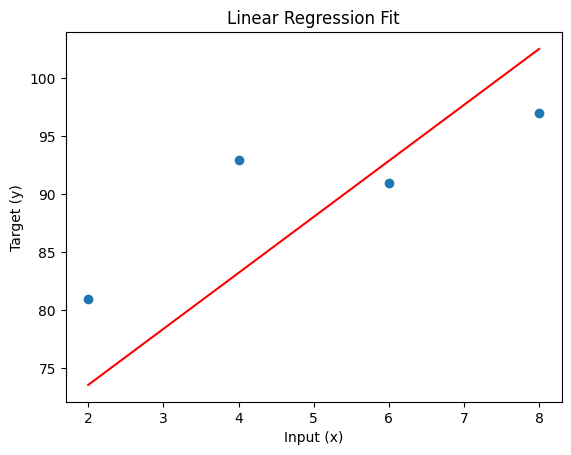

In [32]:
plt.scatter(x, y)                         # 실제 데이터 산점도
plt.plot(x, model.predict(x), 'r')        # 학습된 모델의 예측 직선(빨간색) 표시
plt.xlabel("Input (x)")
plt.ylabel("Target (y)")
plt.title("Linear Regression Fit")
plt.show()

모델 테스트

In [33]:
import tensorflow as tf

# 새로운 입력값(hour)을 넣어 모델이 예측하는 결과를 확인합니다.
hour = 7

#
input_data = tf.constant([[hour]], dtype=tf.float32)

# 
prediction = model.predict(input_data)[0][0]

# 예측 결과를 출력합니다.
print("%.f시간을 입력했을 때, 예상 점수는 %.2f점입니다." % (hour, prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
7시간을 입력했을 때, 예상 점수는 97.71점입니다.


다중선형회귀모델

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Keras API에서 신경망 모델과 Dense 층을 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 두 개의 입력 변수(x1, x2)와 목표값(y)을 NumPy 배열로 정의합니다.
x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])  # 입력 데이터 (x1, x2)
y = np.array([81, 93, 91, 97])                  # 목표 데이터


In [35]:
model = Sequential()

# 입력 변수가 2개
# 활성화 함수는 'linear'를 사용하여 연속적인 값을 예측합니다.
model.add(Dense(1, input_dim=2, activation='linear'))

# 
model.compile(optimizer='sgd', loss='mse')

# 모델 학습 (500 epoch 반복, verbose=0: 학습 과정 출력 생략)
model.fit(x, y, epochs=500, verbose=0)


모델 테스트

In [36]:
import tensorflow as tf

# 새로운 입력값(학습 시간, 과외 시간)을 정의합니다.
hour = 6
private_class = 3

# 입력값을 2차원 텐서로 변환합니다. (형식: [[x1, x2]])
input_data = tf.constant([[hour, private_class]])

# 학습된 모델을 사용하여 예측값을 계산합니다.
prediction = model.predict(input_data)[0][0]

# 예측 결과 출력
print("%.f시간 공부 + %.f시간 과외 → 예상 점수: %.2f점" % (hour, private_class, prediction))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
6시간 공부 + 3시간 과외 → 예상 점수: 94.10점


로지스틱 회귀 모델: 참 거짓 판단하기

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1])

In [39]:
model = Sequential()

# 입력 1개 → 출력 1개인 이진 분류 모델
# 출력층 활성화 함수로 'sigmoid'를 사용하여 결과를 [0, 1] 범위 확률로 변환합니다.
model.add(Dense(1, input_dim=1, activation='sigmoid'))

# 손실 함수: binary_crossentropy (이진 분류에서 사용되는 교차 엔트로피 오차 함수)
# 최적화 알고리즘: SGD
model.compile(optimizer='sgd', loss='binary_crossentropy')

# 모델 학습 (100 epoch 반복)
model.fit(x, y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - loss: 0.5989
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - loss: 0.5847
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.5751
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.5684
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.5636
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.5601
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.5576
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.5556
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.5541
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.5530
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.5520
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.5513
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.5506
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.5501
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.5496
Epoch 16/100
1/1 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


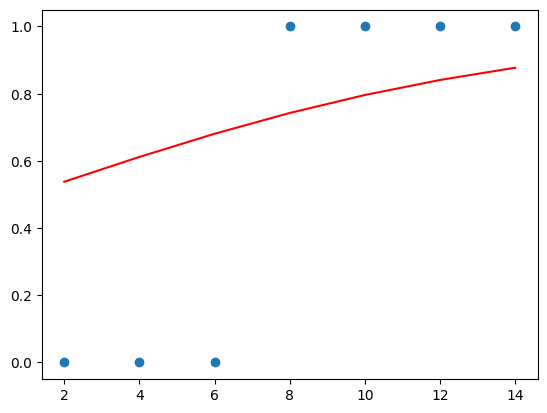

In [40]:
# 실제 데이터와 모델의 예측 결과를 비교하여 시각화합니다.
plt.scatter(x, y)                     # 실제 데이터 산점도
plt.plot(x, model.predict(x), 'r')    # 모델이 예측한 곡선(빨간색)
plt.show()


In [41]:
import tensorflow as tf
print("현재 TensorFlow 버전:", tf.__version__)

# 새로운 입력값(hour)을 정의합니다.
hour = 7

# 입력값을 텐서(float32)로 변환하여 모델에 전달합니다.
input_data = tf.constant([[hour]], dtype=tf.float32)

# 학습된 모델로 합격 확률을 예측합니다.
prediction = model.predict(input_data)[0][0]

# 예측된 확률을 백분율(%)로 변환하여 출력합니다.
print("%.f시간 공부 시, 합격 예상 확률은 %.1f%%입니다." % (hour, prediction * 100))


현재 TensorFlow 버전: 2.19.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
7시간 공부 시, 합격 예상 확률은 71.3%입니다.


퍼셉트론

In [42]:
import numpy as np

# 가중치(웨이트)와 바이어스 설정
w11 = np.array([-2, -2])   # NAND용 1층 가중치
w12 = np.array([ 2,  2])   # OR용 1층 가중치
w2  = np.array([ 1,  1])   # AND용 2층 가중치
b1 = 3                     # NAND 바이어스
b2 = -1                    # OR 바이어스
b3 = -1                    # AND 바이어스

# 단일 퍼셉트론(스텝 함수) 구현: 입력 x, 가중치 w, 바이어스 b → {0,1}
def MLP(x, w, b):
    y = np.sum(w * x) + b   # (선택) np.dot(w, x)로 바꿔도 동일 동작
    return 0 if y <= 0 else 1

# 기본 논리 게이트
def NAND(x1, x2):
    return MLP(np.array([x1, x2]), w11, b1)

def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2)

def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)

# XOR = (x1 NAND x2) AND (x1 OR x2)  — 퍼셉트론 2층 조합으로 구현
def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))

# 테스트: 입력 조합별 XOR 결과 출력
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(x[0], x[1])
    print("입력 값:", x, "→ 출력 값:", y)


입력 값: (0, 0) → 출력 값: 0
입력 값: (1, 0) → 출력 값: 1
입력 값: (0, 1) → 출력 값: 1
입력 값: (1, 1) → 출력 값: 0


In [43]:
# Keras API에서 모델 구성에 필요한 클래스 불러오기
from tensorflow.keras.models import Sequential   # 순차적 신경망 모델
from tensorflow.keras.layers import Dense        # 완전 연결(Dense) 층

# 수치 계산과 배열 연산을 위한 NumPy
import numpy as np


In [44]:
#from google.colab import files
#uploaded = files.upload()

In [45]:
Data_set = np.loadtxt("data/ThoraricSurgery3.csv", delimiter=",")  # CSV 파일에서 데이터를 불러와 배열 형태로 저장합니다.

# 입력 변수(앞 16개 열)와 목표 변수(마지막 열)를 분리합니다.
X = Data_set[:, 0:16]   # 입력 데이터
y = Data_set[:, 16]     # 출력 데이터 (이진 분류: 0 또는 1)

In [46]:
# 순차적으로 층을 쌓는 신경망 모델을 생성합니다.
model = Sequential()

# 은닉층
model.add(Dense(30, input_dim=16, activation='relu'))

# 출력층
model.add(Dense(1, activation='sigmoid'))


In [47]:
# 모델 학습 방법을 설정합니다.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습을 수행합니다.
# 
history = model.fit(X, y, epochs=5, batch_size=16)


Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3657 - loss: 1.6015
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8617 - loss: 0.4306
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8510 - loss: 0.4070
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8524 - loss: 0.4105
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8307 - loss: 0.4832


데이터 다루기

In [48]:
#실행에 필요한 pandas와 seaborn 라이브러리를 설치합니다. (이미 설치되어 있으면 이 과정은 생략합니다.)
!pip install pandas
!pip install seaborn

In [49]:
# 데이터 분석과 시각화를 위한 라이브러리 불러오기
import pandas as pd                  # 데이터프레임 형태로 데이터 다루기
import matplotlib.pyplot as plt       # 기본 그래프 시각화
import seaborn as sns                 # 고급 시각화 스타일 제공




In [50]:
#from google.colab import files
#uploaded = files.upload()

In [51]:
df = pd.read_csv('data/pima-indians-diabetes3.csv')

In [52]:
# 처음 5줄을 봅니다.
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
# 'diabetes' 열의 값 분포를 세어, 정상(0)과 당뇨(1) 환자 수를 확인합니다.
df["diabetes"].value_counts()


,count
diabetes,
0,500
1,268


In [54]:
# 각 정보별 특징을 좀 더 자세히 출력합니다.
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [55]:
# 각 항목이 어느정도의 상관 관계를 가지고 있는지 알아봅니다.
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


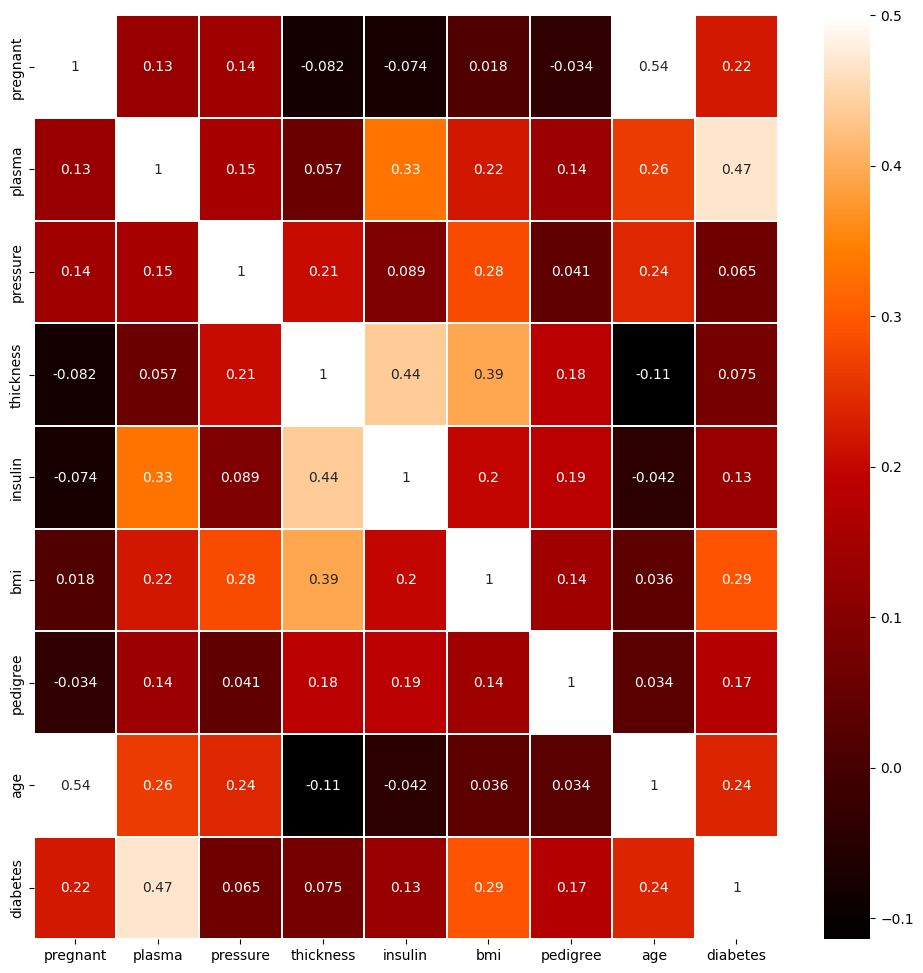

In [56]:
# 데이터프레임의 각 변수 간 상관계수를 히트맵으로 시각화합니다.

colormap = plt.cm.gist_heat    # 색상 맵 스타일 설정
plt.figure(figsize=(12, 12))   # 그래프 크기 지정

# 히트맵 속성 설정
# - linewidths: 셀 경계선 두께
# - vmax=0.5: 최대 색상 강도 (0.5 이상은 동일 색으로 표시)
# - cmap: 색상 구성
# - linecolor: 셀 경계선 색
# - annot=True: 각 셀에 상관계수 값 표시
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap,
            linecolor='white', annot=True)

plt.show()


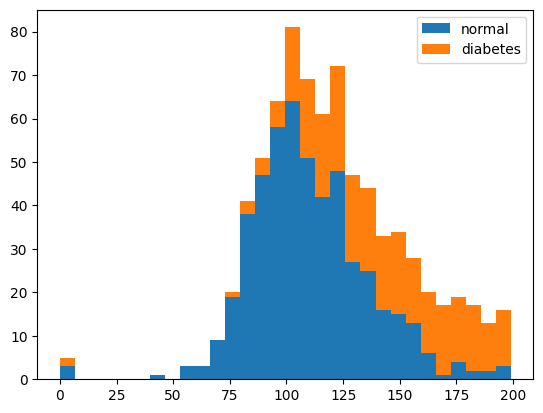

In [57]:
# 'plasma' 변수 기준으로 정상(0)과 당뇨(1) 그룹의 분포를 히스토그램으로 비교합니다.
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]],
         bins=30,              # 구간(bin) 개수
         histtype='barstacked',# 막대를 쌓아서 표시
         label=['normal','diabetes'])  # 범례 라벨
plt.legend()


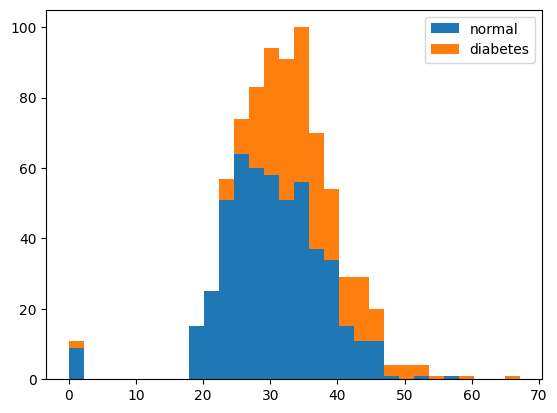

In [58]:
# 'bmi' 변수를 기준으로 정상(0)과 당뇨(1) 그룹의 분포를 히스토그램으로 비교합니다.
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]],
         bins=30,               # 히스토그램 구간(bin) 개수
         histtype='barstacked', # 막대를 쌓아서 표시
         label=['normal','diabetes'])  # 범례 라벨
plt.legend()


In [59]:
from tensorflow.keras.models import Sequential   # 순차적 신경망 모델
from tensorflow.keras.layers import Dense        # 완전 연결(Dense) 층

import pandas as pd  # 데이터 처리를 위한 pandas

# CSV 파일을 불러와 데이터프레임으로 저장합니다. (피마 인디언 당뇨병 데이터셋)
df = pd.read_csv('data/pima-indians-diabetes3.csv')


In [60]:
# 입력 변수(X): 데이터프레임의 앞 8개 열을 선택합니다.
X = df.iloc[:, 0:8]

# 출력 변수(y): 마지막 열(당뇨병 여부)을 선택합니다.
y = df.iloc[:, 8]


In [61]:
# 신경망 모델을 정의합니다.
model = Sequential()

# 첫 번째 은닉층: 입력 변수 8개 → 뉴런 12개, 활성화 함수 ReLU
model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1'))

# 두 번째 은닉층: 뉴런 8개, 활성화 함수 ReLU
model.add(Dense(8, activation='relu', name='Dense_2'))

# 출력층: 뉴런 1개, 활성화 함수 sigmoid (이진 분류 확률 출력)
model.add(Dense(1, activation='sigmoid', name='Dense_3'))

# 모델 구조 요약 출력
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense_1 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [62]:
# 모델 학습 방법을 설정합니다.
# - 손실 함수: binary_crossentropy (이진 분류 문제용)
# - 최적화 알고리즘: Adam
# - 평가 지표: 정확도(accuracy)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습을 수행합니다.
# - epochs=100 : 전체 데이터셋을 100번 반복 학습
# - batch_size=5 : 한 번에 5개 샘플씩 학습
history = model.fit(X, y, epochs=100, batch_size=5)


Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6157 - loss: 6.7238
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6493 - loss: 1.6957
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6452 - loss: 1.3633
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6334 - loss: 0.9315
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6762 - loss: 0.8264
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6578 - loss: 0.7894
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6363 - loss: 0.7394
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6587 - loss: 0.8239
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6838 - loss: 0.6519
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6637 - loss: 0.7030
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6615 - loss: 0.7028
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━

다중 분류문제

In [63]:
#import pandas as pd
#uploaded = files.upload()


In [64]:
df = pd.read_csv('data/iris3.csv')

In [65]:
# 데이터프레임의 상위 5행을 출력하여 데이터 구조를 확인합니다.
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


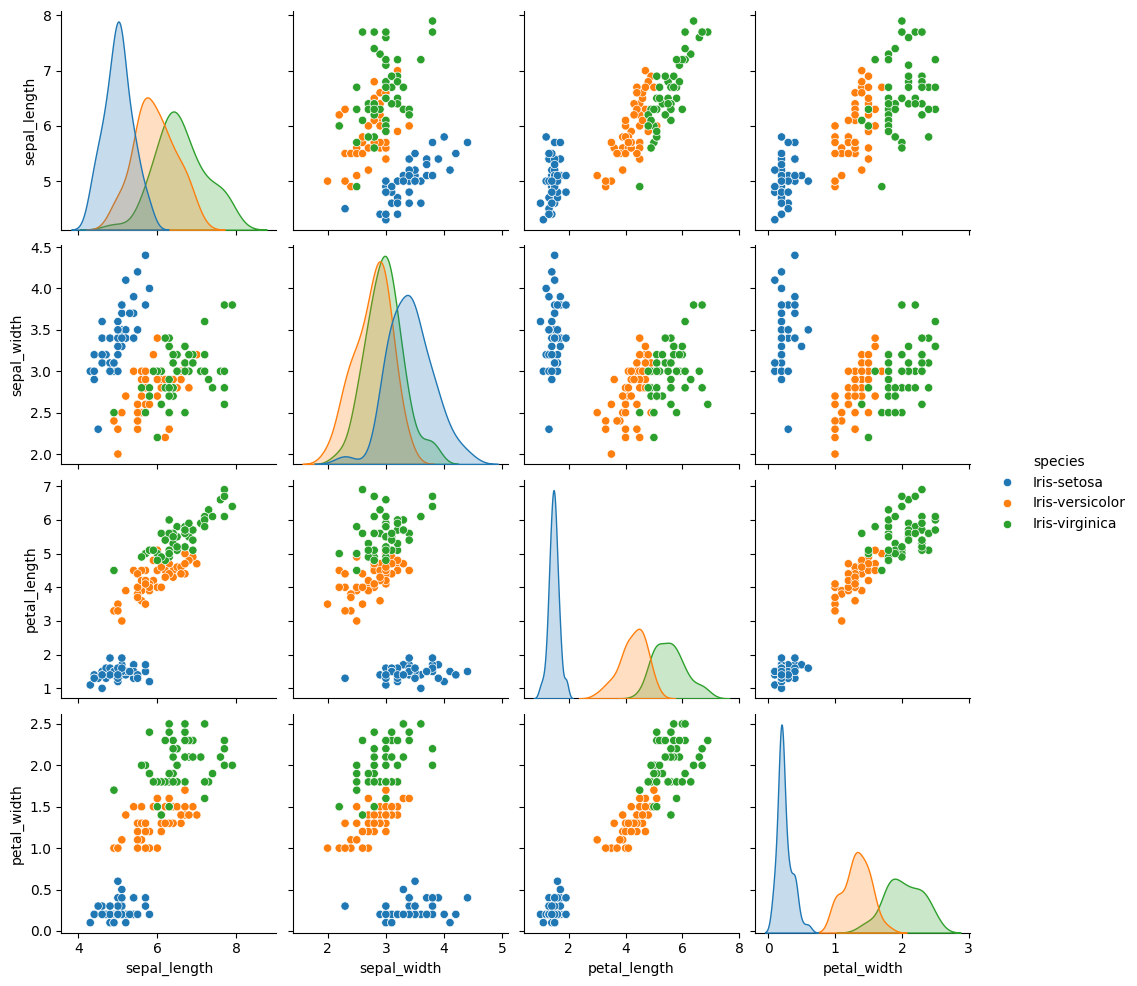

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 특성(feature) 쌍의 산점도를 그려 종(species)별 분포를 시각화합니다.
sns.pairplot(df, hue='species')

plt.show()


In [67]:
# 입력 변수(X): 데이터프레임의 앞 4개 열 선택
X = df.iloc[:, 0:4]

# 출력 변수(y): 마지막 열(품종 정보) 선택
y = df.iloc[:, 4]

# 입력 변수와 출력 변수의 상위 5행을 확인합니다.
print(X[0:5])
print(y[0:5])


   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [68]:
# 출력 변수(y)를 원-핫 인코딩하여 각 클래스(품종)를 이진 벡터 형태로 변환합니다.
y = pd.get_dummies(y)

# 변환된 결과의 상위 5행을 확인합니다.
print(y[0:5])


   Iris-setosa  Iris-versicolor  Iris-virginica
0         True            False           False
1         True            False           False
2         True            False           False
3         True            False           False
4         True            False           False


소프트맥스

In [69]:
# 필요한 Keras 모듈 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 신경망 모델 정의
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))  # 첫 번째 은닉층 
model.add(Dense(8, activation='relu'))                # 두 번째 은닉층 
model.add(Dense(3, activation='softmax'))             # 출력층 
model.summary()

# 모델 컴파일
# - 손실 함수: categorical_crossentropy (다중 클래스 분류용)
# - 최적화 알고리즘: Adam
# - 평가 지표: 정확도(accuracy)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
# - epochs=30 : 전체 데이터셋을 30번 반복 학습
# - batch_size=5 : 한 번에 5개 샘플씩 학습
history = model.fit(X, y, epochs=30, batch_size=5)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 12)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191 (764.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3260 - loss: 1.8750
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3819 - loss: 1.0828
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3785 - loss: 0.9902
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4487 - loss: 0.8727
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4299 - loss: 0.8583
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4597 - loss: 0.8194
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6998 - loss: 0.7942
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8223 - loss: 0.7751
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8992 - loss: 0.7357
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8751 - loss: 0.7144
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9521 - loss: 0.7234
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9326 - lo

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/iris3.csv')

# 입력 변수(X)와 출력 변수(y)를 분리합니다.
X = df.iloc[:, 0:4]   # 앞 4개 열: 
y = df.iloc[:, 4]     # 

# 출력 변수(y)를 원-핫 인코딩하여 다중 클래스 분류에 적합한 형식으로 변환합니다.
y = pd.get_dummies(y)

# 신경망 모델을 정의합니다.
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))  # 은닉층 1: 입력 4 → 뉴런 12
model.add(Dense(8,  activation='relu'))               # 은닉층 2: 뉴런 8
model.add(Dense(3,  activation='softmax'))            # 출력층: 클래스 3개, 확률 출력
model.summary()

# 모델 학습 방법을 설정합니다.
# - 손실 함수



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 12)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191 (764.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

In [72]:
# 모델 학습 방법을 설정합니다.
# - 손실 함수: categorical_crossentropy (다중 클래스 분류용)
# - 최적화 알고리즘: Adam
# - 평가 지표: 정확도(accuracy)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 학습합니다. (전체 데이터 30 epoch, 배치 크기 5)
history = model.fit(X, y, epochs=30, batch_size=5)

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4233 - loss: 2.1576
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3403 - loss: 1.4001
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3685 - loss: 1.0204
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5045 - loss: 0.9870
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5304 - loss: 0.9457
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6909 - loss: 0.8975
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6701 - loss: 0.8509
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6156 - loss: 0.8203
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5455 - loss: 0.7998
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7184 - loss: 0.7375
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6784 - loss: 0.7017
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6736 - lo

모델 성능검증

In [73]:
#import pandas as pd
#uploaded = files.upload()

In [74]:


# 데이터 입력
df = pd.read_csv('data/sonar3.csv', header=None)

# 첫 5줄을 봅니다.
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [ ]:
# 마지막 열(열 인덱스 60)에 저장된 클래스 분포를 확인합니다.
# 0: 일반 암석, 1: 광석
df[60].value_counts()


,count
60,
1,111
0,97


In [ ]:
# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 신경망 모델 정의
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))  # 은닉층 1: 입력 60개 → 뉴런 24개
model.add(Dense(10, activation='relu'))                # 은닉층 2: 뉴런 10개
model.add(Dense(1, activation='sigmoid'))              # 출력층: 뉴런 1개 (이진 분류 확률 출력)

# 모델 컴파일
# - 손실 함수: binary_crossentropy (이진 분류용)
# - 최적화 알고리즘: Adam
# - 평가 지표: 정확도(accuracy)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
# - epochs=200 : 데이터 전체를 200번 반복 학습
# - batch_size=10 : 1회 학습 시 샘플 10개씩 처리
history = model.fit(X, y, epochs=200, batch_size=10)


Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5738 - loss: 0.6827
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5949 - loss: 0.6606
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6341 - loss: 0.6506
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6622 - loss: 0.6370
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7239 - loss: 0.5986
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7158 - loss: 0.5873
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8037 - loss: 0.5688
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7496 - loss: 0.5665
Epoch 9/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8203 - loss: 0.5251
Epoch 10/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8340 - loss: 0.5371
Epoch 11/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7667 - loss: 0.5338
Epoch 12/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy:

In [75]:
# 사이킷런(scikit-learn) 라이브러리를 설치합니다.
# (머신러닝 모델 학습, 데이터 전처리, 평가 등에 활용)
!pip install scikit-learn


In [76]:
from tensorflow.keras.models import Sequential    # 순차적 신경망 모델 클래스
from tensorflow.keras.layers import Dense         # 완전 연결(Dense) 층
from sklearn.model_selection import train_test_split  # 훈련/테스트 데이터 분할 함수

import pandas as pd   # 데이터프레임 형태로 데이터 처리


In [77]:
# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [78]:
# 데이터를 학습용(70%)과 테스트용(30%)으로 분리합니다.
# - test_size=0.3 : 전체 데이터의 30%를 테스트 세트로 사용
# - shuffle=True  : 분리하기 전에 데이터를 무작위로 섞음
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)



In [79]:
# 신경망 모델 정의
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))  # 첫 번째 은닉층 (입력 60차원 → 뉴런 24개)
model.add(Dense(10, activation='relu'))                # 두 번째 은닉층 (뉴런 10개)
model.add(Dense(1, activation='sigmoid'))              # 출력층 (이진 분류 확률 출력)

# 모델 컴파일
# - 손실 함수: binary_crossentropy (이진 분류 문제용)
# - 최적화 알고리즘: Adam
# - 평가 지표: 정확도(accuracy)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
# - epochs=200 : 전체 데이터를 200번 반복 학습
# - batch_size=10 : 한 번에 10개 샘플씩 학습
history = model.fit(X_train, y_train, epochs=200, batch_size=10)



Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6067 - loss: 0.6749
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5499 - loss: 0.6785
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5638 - loss: 0.6718
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5663 - loss: 0.6522
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5823 - loss: 0.6420
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6781 - loss: 0.6249
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6132 - loss: 0.6358
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6906 - loss: 0.6165
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7269 - loss: 0.5985  
Epoch 10/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7644 - loss: 0.5676
Epoch 11/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7982 - loss: 0.5504
Epoch 12/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.773

In [80]:
# 테스트 세트를 사용해 모델 성능(손실 값과 정확도)을 평가합니다.
score = model.evaluate(X_test, y_test)

# 정확도(accuracy) 지표를 출력합니다.
print('Test accuracy:', score[1])


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step - accuracy: 0.8421 - loss: 0.5123
Test accuracy: 0.841269850730896


모델 저장하기.

In [81]:
import os
print(os.getcwd())

/content/202508_LG


In [82]:
# 학습이 완료된 모델을 파일로 저장합니다.
# - '/content/' : 구글 코랩 세션의 기본 작업 디렉터리
# - 'my_model.keras' : 저장될 모델 파일 이름
#   (세션 종료 시 파일은 사라지므로, 오래 보관하려면 Google Drive에 저장해야 함)
model.save('/content/my_model.keras')


In [83]:
# Keras에서 모델 정의 및 불러오기에 필요한 클래스를 불러옵니다.
from tensorflow.keras.models import Sequential   # 순차적으로 층을 쌓는 신경망 모델
from tensorflow.keras.models import load_model   # 저장된 모델을 불러오는 함수


In [84]:
# 메모리에 있던 모델을 지웁니다. (저장·불러오기 테스트를 위해 사용)
del model


In [85]:
# /content 폴더에 저장된 모델 파일을 다시 불러옵니다.
model = load_model('/content/my_model.keras')

# 불러온 모델을 테스트 데이터로 평가하여 손실 값과 정확도를 반환합니다.
score = model.evaluate(X_test, y_test)

# 정확도만 출력합니다.
print('Test accuracy:', score[1])


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.8421 - loss: 0.5123
Test accuracy: 0.841269850730896


교차검증

In [86]:
from tensorflow.keras.models import Sequential     # 순차적 신경망 모델
from tensorflow.keras.layers import Dense          # 완전연결(Dense) 층
from sklearn.model_selection import KFold          # 교차검증 분할 도구
from sklearn.metrics import accuracy_score         # 분류 정확도 계산 함수

# 입력 변수(X): 앞의 60개 열(음파 관련 수치 특성)
X = df.iloc[:, 0:60]

# 출력 변수(y): 마지막 열(광물 라벨; 0=암석, 1=광석 등)
y = df.iloc[:, 60]


In [87]:
from tensorflow.keras import Input
# 교차 검증에서 몇 겹(n_splits)으로 나눌지를 설정합니다.
k = 5

# KFold 객체 생성 (데이터를 k겹으로 나누고, 무작위로 섞어서 분할)
kfold = KFold(n_splits=k, shuffle=True)

# 각 검증에서 계산된 정확도를 저장할 리스트
acc_score = []

# 모델 생성 함수 (호출할 때마다 새로운 모델을 반환)
def model_fn():
    model = Sequential()
    model.add(Input(shape=(60,)))                 # 입력 크기 명시
    model.add(Dense(24, activation='relu'))       # 은닉층 1
    model.add(Dense(10, activation='relu'))       # 은닉층 2
    model.add(Dense(1, activation='sigmoid'))     # 출력층
    return model

# K겹 교차 검증 실행
for train_index, test_index in kfold.split(X):
    # 학습셋과 테스트셋 분리
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 모델 생성 및 컴파일
    model = model_fn()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # 모델 학습 (verbose=0 → 학습 과정 출력 생략)
    history = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)

    # 테스트셋으로 모델 성능 평가 (정확도만 가져오기)
    accuracy = model.evaluate(X_test, y_test)[1]
    acc_score.append(accuracy)  # 리스트에 정확도 기록

# k번 평가된 정확도의 평균 계산
avg_acc_score = sum(acc_score) / k

# 결과 출력
print('각 분할 정확도:', acc_score)
print('평균 정확도:', avg_acc_score)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - accuracy: 0.7212 - loss: 1.0918
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.7634 - loss: 0.6446
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.8527 - loss: 0.7073
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 493ms/step - accuracy: 0.8237 - loss: 0.5568
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - accuracy: 0.7436 - loss: 0.8131
각 분할 정확도: [0.738095223903656, 0.7857142686843872, 0.8571428656578064, 0.8292682766914368, 0.7560975551605225]
평균 정확도: 0.7932636380195618


모델 성능 개선

In [88]:
import warnings

# 실행 중 발생하는 경고 메시지를 출력하지 않도록 설정합니다.
# (모델 학습 과정에서 불필요한 경고가 화면에 보이지 않게 하기 위함)
warnings.filterwarnings('ignore')


In [89]:
from tensorflow.keras.models import Sequential    # 순차적으로 층을 쌓는 신경망 모델
from tensorflow.keras.layers import Dense         # 완전 연결(Dense) 층
from sklearn.model_selection import train_test_split  # 학습용/테스트용 데이터 분리 함수
import pandas as pd   # CSV 불러오기, 데이터프레임 처리


In [90]:
#import pandas as pd
#uploaded = files.upload()

In [91]:
df = pd.read_csv('data/wine.csv', header=None)

In [92]:
# 데이터의 앞부분 5행 미리보기
df.head()

# 데이터의 뒷부분 5행 확인
df.tail()

# 데이터프레임의 요약 정보 확인 (행·열 수, 결측치, 데이터 타입 등)
df.info()

# 각 열의 기초 통계 확인
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [93]:
# 입력 변수(X): 데이터프레임의 앞 12개 열 (와인의 속성 값들)
X = df.iloc[:, 0:12]

# 출력 변수(y): 마지막 열 (와인의 분류 레이블)
y = df.iloc[:, 12]


In [94]:
# 데이터를 학습셋(80%)과 테스트셋(20%)으로 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 신경망 모델 구조 정의
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))  # 입력 12개 → 은닉층 30개 노드
model.add(Dense(12, activation='relu'))                # 은닉층 2: 노드 12개
model.add(Dense(8, activation='relu'))                 # 은닉층 3: 노드 8개
model.add(Dense(1, activation='sigmoid'))              # 출력층: 노드 1개 (이진 분류 확률)
model.summary()

# 모델 학습 설정
# - 손실 함수: binary_crossentropy (이진 분류용)
# - 최적화 알고리즘: Adam
# - 평가 지표: 정확도
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습 실행
# - epochs=50 : 전체 데이터 50번 반복 학습
# - batch_size=500 : 학습 시 한 번에 500개 샘플씩 사용
# - validation_split=0.25 : 학습셋 중 25%를 검증용으로 사용 (전체 데이터의 약 20%)
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 364ms/step - accuracy: 0.2546 - loss: 18.3613 - val_accuracy: 0.2377 - val_loss: 13.2733
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2462 - loss: 11.3747 - val_accuracy: 0.2377 - val_loss: 6.5020
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2494 - loss: 5.0452 - val_accuracy: 0.2423 - val_loss: 1.5639
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4479 - loss: 1.0535 - val_accuracy: 0.8123 - val_loss: 0.4220
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8031 - loss: 0.4222 - val_accuracy: 0.8038 - val_loss: 0.4024
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8178 - loss: 0.3908 - val_accuracy: 0.8069 - val_loss: 0.3857
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8161 - loss: 0.3830 - val_accuracy: 0.8323 - val_loss: 0.3636
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8420 - loss: 0.3560 - val_accuracy: 0.8638 - val_loss: 0.3

In [95]:
# 테스트셋을 사용해 모델 성능(손실과 정확도)을 평가합니다.
score = model.evaluate(X_test, y_test)

# 정확도(accuracy) 지표만 출력합니다.
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9354 - loss: 0.1729
Test accuracy: 0.9323077201843262


모델 업데이트

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV 파일 불러오기 (와인 데이터셋, 헤더 없음)
df = pd.read_csv('./data/wine.csv', header=None)

# 입력 변수(X): 앞의 12개 열 (와인의 속성 값)
X = df.iloc[:, 0:12]

# 출력 변수(y): 마지막 열 (와인의 분류 레이블)
y = df.iloc[:, 12]

# 데이터를 학습용(80%)과 테스트용(20%)으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 신경망 모델 구조 정의
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))  # 은닉층 1: 입력 12개 → 노드 30개
model.add(Dense(12, activation='relu'))                # 은닉층 2: 노드 12개
model.add(Dense(8, activation='relu'))                 # 은닉층 3: 노드 8개
model.add(Dense(1, activation='sigmoid'))              # 출력층: 노드 1개 (이진 분류 확률 출력)
model.summary()

# 모델 학습 설정
# - 손실 함수: binary_crossentropy (이진 분류용)
# - 최적화 알고리즘: Adam
# - 평가 지표: 정확도
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# 모델 저장 폴더를 생성합니다. (이미 있으면 건너뜁니다)
# Colab 환경에서는 '/content' 디렉토리가 기본 작업 경로입니다.
model_dir = '/content/model/all'
os.makedirs(model_dir, exist_ok=True)

# 모델 저장 조건을 설정합니다.

modelpath = os.path.join(model_dir, '{epoch:02d}-{val_accuracy:.4f}.keras')
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델 학습을 실행합니다.

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=500,
    validation_split=0.25,
    verbose=0,
    callbacks=[checkpointer]
)



Epoch 1: saving model to /content/model/all/01-0.9215.keras

Epoch 2: saving model to /content/model/all/02-0.9285.keras

Epoch 3: saving model to /content/model/all/03-0.9285.keras

Epoch 4: saving model to /content/model/all/04-0.9323.keras

Epoch 5: saving model to /content/model/all/05-0.9346.keras

Epoch 6: saving model to /content/model/all/06-0.9354.keras

Epoch 7: saving model to /content/model/all/07-0.9354.keras

Epoch 8: saving model to /content/model/all/08-0.9362.keras

Epoch 9: saving model to /content/model/all/09-0.9338.keras

Epoch 10: saving model to /content/model/all/10-0.9354.keras

Epoch 11: saving model to /content/model/all/11-0.9346.keras

Epoch 12: saving model to /content/model/all/12-0.9369.keras

Epoch 13: saving model to /content/model/all/13-0.9354.keras

Epoch 14: saving model to /content/model/all/14-0.9377.keras

Epoch 15: saving model to /content/model/all/15-0.9354.keras

Epoch 16: saving model to /content/model/all/16-0.9392.keras

Epoch 17: saving

In [98]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9669 - loss: 0.1073
Test accuracy: 0.9723076820373535


과적합 점검

In [ ]:
# 과적합 여부를 확인하기 위해 긴 학습을 수행합니다.
# - epochs=2000 : 전체 데이터를 2000번 반복 학습 (매우 큰 값 → 시간이 오래 걸릴 수 있음)
# - batch_size=500 : 학습 시 한 번에 500개 샘플 사용
# - verbose=0 : 학습 과정 출력 생략
# - validation_split=0.25 : 학습 데이터의 25%를 검증용으로 사용
# 결과: 학습 손실/정확도와 검증 손실/정확도를 비교하여 과적합 여부를 그래프로 확인할 수 있습니다.
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)


In [ ]:
# history 객체에 저장된 학습 과정을 DataFrame으로 변환합니다.
# - loss : 
# - accuracy : 
# - val_loss : 
# - val_accuracy : 
hist_df = pd.DataFrame(history.history)

# DataFrame 출력 (epoch별 학습 결과를 행 단위로 확인 가능)
hist_df



In [ ]:
# 검증셋 손실(val_loss)과 학습셋 손실(loss)을 각각 추출합니다.
y_vloss = hist_df['val_loss']   # 검증 손실
y_loss  = hist_df['loss']       # 학습 손실

# x축 값(에포크 번호)을 지정합니다.
x_len = np.arange(len(y_loss))

# 손실 그래프 그리기
# - 검증 손실: 빨간색 점
# - 학습 손실: 파란색 점
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Validation Loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Training Loss')

# 범례, 축 레이블, 출력
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


학습 자동중단

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

# CSV 파일 불러오기 (와인 데이터셋, 헤더 없음)
df = pd.read_csv('./data/wine.csv', header=None)

# 입력 변수(X): 앞의 12개 열 (와인의 화학적 속성 값들)
X = df.iloc[:, 0:12]

# 출력 변수(y): 마지막 열 (와인의 분류 레이블, 이진 분류)
y = df.iloc[:, 12]

# 데이터를 학습용(80%)과 테스트용(20%)으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 신경망 모델 구조 정의
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))  # 은닉층 1: 입력 12차원 → 노드 30개
model.add(Dense(12, activation='relu'))                # 은닉층 2: 노드 12개
model.add(Dense(8, activation='relu'))                 # 은닉층 3: 노드 8개
model.add(Dense(1, activation='sigmoid'))              # 출력층: 노드 1개 (이진 분류 확률 출력)
model.summary()

# 모델 학습 설정
# - 손실 함수: binary_crossentropy (이진 분류 문제에 적합)
# - 최적화 알고리즘: Adam
# - 평가 지표: 정확도(accuracy)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
